In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Data/data.csv")

# Cleaning And Analyzing Data

In [3]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
columns = ["ChannelName", "UserName", "Subs(M)", "Views(B)", "Videos", "ChannelDesc"]
df.columns = columns

In [5]:
df.drop([2, 5, 12, 18], axis = 0, inplace = True)
df.reset_index(inplace = True)
df.drop("index", axis = 1, inplace = True)

In [6]:
def convertDataType(value):
    return int(value[:-1])
df["Subs(M)"] = df["Subs(M)"].apply(convertDataType)
df["Views(B)"] = df["Views(B)"].apply(convertDataType)

In [7]:
df["AverageViewsPerVideos(M)"] = (df["Views(B)"] / df["Videos"] * 1_000_000_000).astype(int)

In [8]:
df.describe()

,Subs(M),Views(B),Videos,AverageViewsPerVideos(M)
count,96.000000,96.000000,96.000000,9.600000e+01
mean,59.145833,34.291667,23318.447917,3.770555e+07
std,33.376632,34.100136,57170.891804,5.624274e+07
min,37.000000,3.000000,76.000000,3.454600e+04
25%,40.750000,17.000000,564.750000,3.651807e+06
50%,46.000000,26.000000,1558.500000,1.169097e+07
75%,60.500000,36.250000,7157.750000,4.562937e+07
max,248.000000,232.000000,301612.000000,2.738095e+08


In [9]:
df

,ChannelName,UserName,Subs(M),Views(B),Videos,ChannelDesc,AverageViewsPerVideos(M)
0,T-Series,@tseries,248,232,19430,"'""Music can change the world"". T-Series is Ind...",11940298
1,MrBeast,@mrbeast,181,31,747,'SUBSCRIBE FOR A COOKIE!\nAccomplishments:\n- ...,41499330
2,Cocomelon - Nursery Rhymes,@cocomelon,164,168,1001,"'At CoComelon, our primary goal has always bee...",167832167
3,SET India,@setindia,161,151,118126,'Sony Entertainment Television is one of the l...,1278296
4,✿ Kids Diana Show,@kidsdianashow,113,95,1119,'Welcome to Diana and Roma world - where Diana...,84897229
...,...,...,...,...,...,...,...
91,ช่อง One31,@one31official,38,27,119042,'ยินดีต้อนรับสู่ช่องวัน 31 \nช่องทีวีที่มีควา�...,226810
92,Maria Clara & JP,@mariaclaraejp,38,25,753,'Sejam bem vindos ao canal da Maria Clara e JP...,33200531
93,Jkk Entertainment,@jkk_entertainment,37,16,222,"'Jkk Entertainment Is The Official Channel ""In...",72072072
94,ABP NEWS,@abpnews,37,13,301612,'Watch ABP News Live TV and stay tuned for all...,43101


# Data Visualization

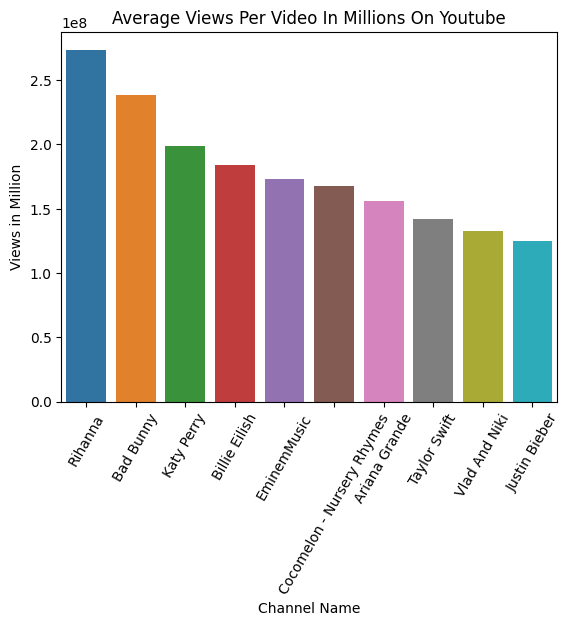

In [10]:
top10avgViewsPerVideos = df.sort_values(by = "AverageViewsPerVideos(M)", ascending = False).head(10)
sns.barplot(data = top10avgViewsPerVideos, x = "ChannelName", y = "AverageViewsPerVideos(M)")
plt.title("Average Views Per Video In Millions On Youtube")
plt.xlabel("Channel Name")
plt.ylabel("Views in Million")
plt.xticks(rotation = 60)
plt.show()

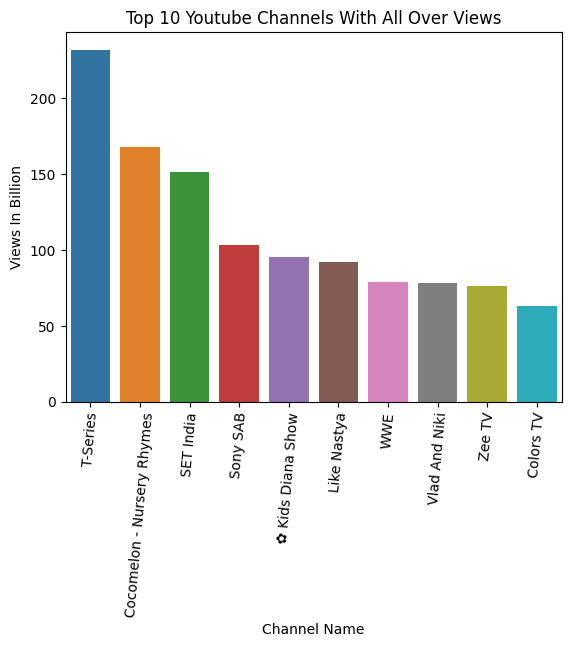

In [11]:
top10AllOverViews = df.sort_values(by = "Views(B)", ascending = False).head(10)
sns.barplot(data = top10AllOverViews, x = "ChannelName", y = "Views(B)")
plt.title("Top 10 Youtube Channels With All Over Views")
plt.xlabel("Channel Name")
plt.ylabel("Views In Billion")
plt.xticks(rotation = 85)
plt.show()

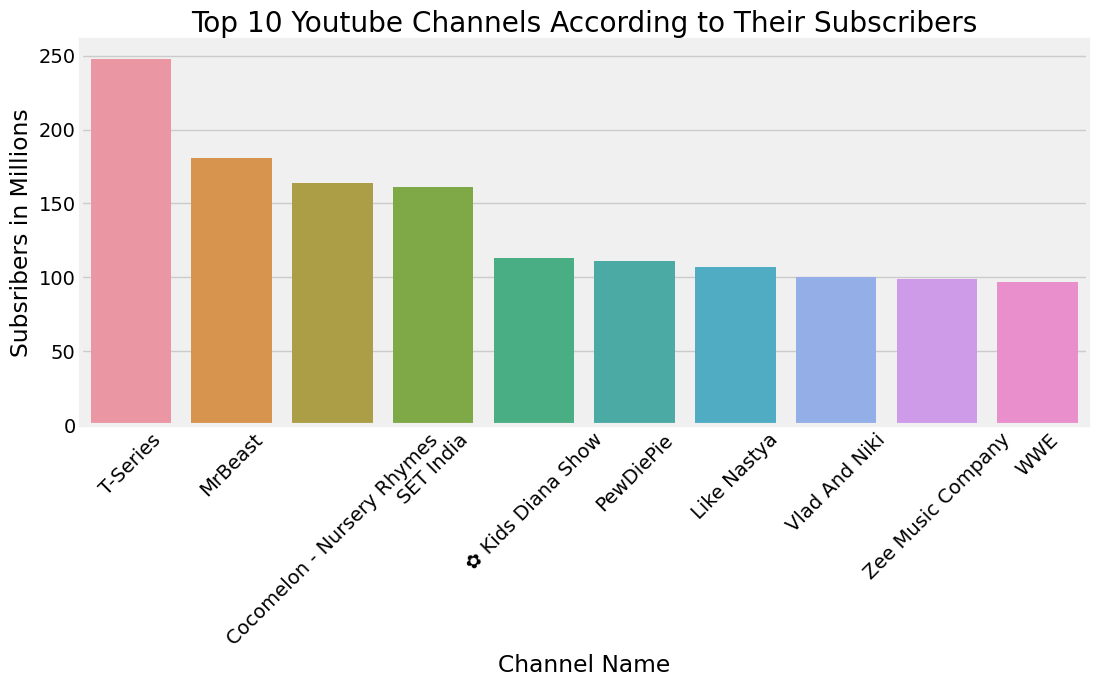

In [12]:
top10Channels = df.sort_values(by = "Subs(M)", ascending = False).head(10)
plt.figure(figsize=(13, 5))
plt.style.use("fivethirtyeight")
sns.barplot(data = top10Channels, x = "ChannelName", y = "Subs(M)")
plt.xticks(rotation = 45)
plt.title("Top 10 Youtube Channels According to Their Subscribers")
plt.xlabel("Channel Name")
plt.ylabel("Subsribers in Millions")
plt.show()

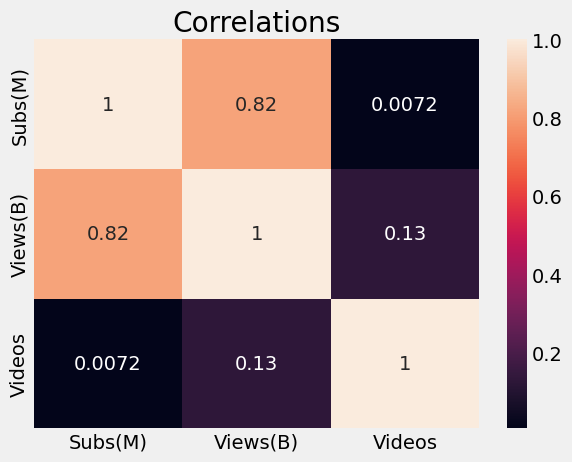

In [13]:
data = df.drop(["ChannelName", "UserName", "ChannelDesc", "AverageViewsPerVideos(M)"], axis = 1)
data = data.corr()
sns.heatmap(data, annot=True)
plt.title("Correlations")
plt.show()

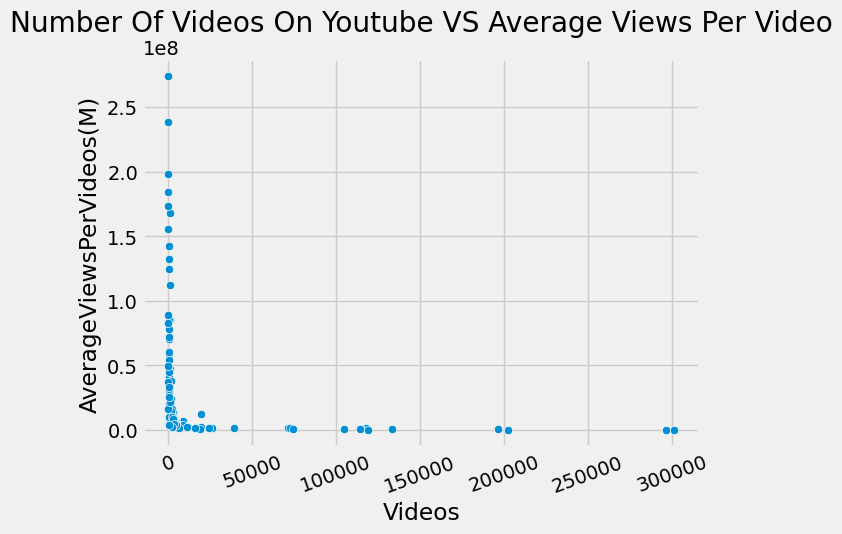

In [14]:
sns.scatterplot(data = df, x = "Videos", y = "AverageViewsPerVideos(M)")
plt.xticks(rotation = 20)
plt.title("Number Of Videos On Youtube VS Average Views Per Video")
plt.show()

C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


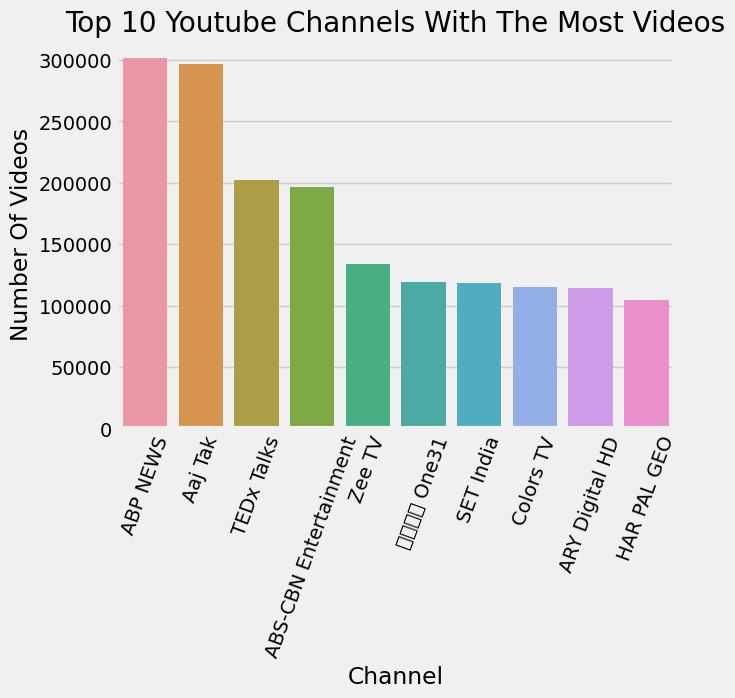

In [15]:
top10MostVideos = df.sort_values(by = "Videos", ascending = False).head(10)
sns.barplot(data = top10MostVideos, x = "ChannelName", y = "Videos")
plt.title("Top 10 Youtube Channels With The Most Videos")
plt.xticks(rotation = 70)
plt.xlabel("Channel")
plt.ylabel("Number Of Videos")
plt.show()